In [3]:
from langchain.document_loaders import PyPDFLoader
from langchain.document_loaders.parsers.pdf import (
    PDFMinerParser,
    PDFPlumberParser,
    PyMuPDFParser,
    PyPDFium2Parser,
    PyPDFParser,
)
from langchain.document_loaders.parsers.html import BS4HTMLParser

# Source loading

### PDF loader

In [29]:
loader = PyPDFLoader("ignore/documents/ISYE 6501 Lecture Transcripts (2).pdf")

#Load the document by calling loader.load()
pages = loader.load()
print(f'Number of pages extracted: {len(pages)}')
print(f'Metadata: {pages[0].metadata}')
print()
print('First 50 characters', pages[0].page_content[0:50], end='')

with open('ignore/documents/parsed_pdf.txt', mode="w", encoding="utf-8") as f:
    for page in pages:
        f.write(page.page_content)

Number of pages extracted: 291
Metadata: {'source': 'ignore/documents/ISYE 6501 Lecture Transcripts (2).pdf', 'page': 0}

First 50 characters ISYE
6501
Lecture
Transcripts
About
This
Document


### Video loader and parser

In [5]:
# from langchain.document_loaders.generic import GenericLoader
# from langchain.document_loaders.parsers.audio import OpenAIWhisperParser
# from langchain.document_loaders.blob_loaders.youtube_audio import YoutubeAudioLoader
# 
# url="https://www.youtube.com/watch?v=-MOhB2ZoEHw&ab_channel=BrianFeroldi"
# save_dir="ignore/videos/youtube/"
# loader = GenericLoader(
#     YoutubeAudioLoader([url],save_dir),
#     OpenAIWhisperParser()
# )
# docs = loader.load()
# print(f'Number of pages extracted: {len(pages)}')
# print(f'Metadata: {pages[0].metadata}')
# print()
# print('First 50 characters', pages[0].page_content[0:50], end='')

# with open('ignore/documents/parsed_video.txt', mode="w", encoding="utf-8") as f:
#     for page in pages:
#         f.write(page.page_content)

## Document Splitting

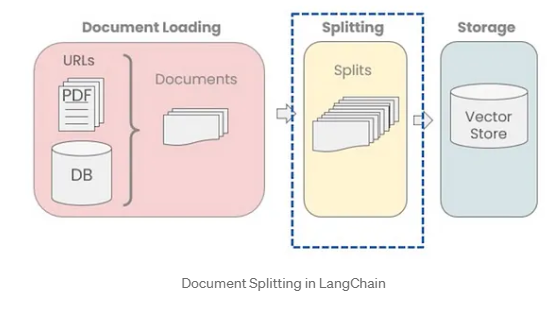

Documents can be very long hence we need to split up not just the documents but the sentences and chunks to keep their meaning. 

The below aims to split the chunks into semantically relevant chunks

In [25]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

text = """When writing documents, writers will use document structure to group content. \
This can convey to the reader, which idea's are related. For example, closely related ideas \
are in sentances. Similar ideas are in paragraphs. Paragraphs form a document. \n\n  \
Paragraphs are often delimited with a carriage return or two carriage returns. \
Carriage returns are the "backslash n" you see embedded in this string. \
Sentences have a period at the end, but also, have a space.\
and words are separated by space."""

print(f'Length of text given {len(text)}')

chunk_size = 250 # length of each chunk
chunk_overlap = 0 # 

r_splitter = RecursiveCharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separators = ["\n\n", '\n', ' ', '']
)

r_splitter.split_text(text)


Length of text given 496


["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.",
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

In [26]:
c_splitter = CharacterTextSplitter(
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    separator = ' '
)

c_splitter.split_text(text)

["When writing documents, writers will use document structure to group content. This can convey to the reader, which idea's are related. For example, closely related ideas are in sentances. Similar ideas are in paragraphs. Paragraphs form a document.",
 'Paragraphs are often delimited with a carriage return or two carriage returns. Carriage returns are the "backslash n" you see embedded in this string. Sentences have a period at the end, but also, have a space.and words are separated by space.']

While splitting, we can use overlapping to maintain notion of consistency